In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.DataFrame(pd.read_excel(r"F:\LPU\Data\Datasets\Internship datasets\UsPathway\US Pathway Complete Data.xlsx", sheet_name='Phone Metrics'))

In [5]:
df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,mobile_number,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,...,status,call_duration_sec,calls_done_by,contacted,call_time,calls_done_by2,new_followup,sales_squad,squad_role,calls_done_by_without_spaces
0,2704878,Pranav,l:861701659054416,NaN,NaN,NaN,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,...,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,SuryanshTiwari,NaN,Squad 3,Agent,SuryanshTiwari
1,2288584,Ramakrishnan,l:966563021758786,NaN,NaN,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,...,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,DiptikantaJena,NaN,Squad 1,TL,DiptikantaJena
2,2721420,Purnima kuppala,l:430457079653387,NaN,NaN,NaN,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,...,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,JatinLuthra,NaN,Squad 3,Agent,JatinLuthra
3,693703,Sambit,NaN,NaN,NaN,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,...,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,ChitwanSoni,NaN,Squad 3,Agent,ChitwanSoni
4,2712125,Gokul Krishna,l:1547362259166875,NaN,NaN,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,...,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,RatneshMishra,NaN,Squad 1,Agent,RatneshMishra


In [6]:
df = df.drop(['calls_done_by2', 'calls_done_by_without_spaces', 'mobile_number', 'new_followup'], axis=1)
df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted,call_time,sales_squad,squad_role
0,2704878,Pranav,l:861701659054416,NaN,NaN,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent
1,2288584,Ramakrishnan,l:966563021758786,NaN,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,Squad 1,TL
2,2721420,Purnima kuppala,l:430457079653387,NaN,NaN,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,Squad 3,Agent
3,693703,Sambit,NaN,NaN,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 16:44:00,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,Squad 3,Agent
4,2712125,Gokul Krishna,l:1547362259166875,NaN,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,Squad 1,Agent


In [7]:
df['Lead Id'].isnull().sum()

np.int64(67264)

In [8]:
import pandas as pd
df['inbound_phone_call_counter'] = pd.to_numeric(df['inbound_phone_call_counter'], errors='coerce')
df['outbound_phone_call_counter'] = pd.to_numeric(df['outbound_phone_call_counter'], errors='coerce')
df.loc[df['activity'] == 'Inbound Phone Call Activity', 'outbound_phone_call_counter'] = 0
df.loc[df['activity'] == 'Outbound Phone Call Activity', 'inbound_phone_call_counter'] = 0

# df['inbound_phone_call_counter'] = df['inbound_phone_call_counter'].fillna(0).astype(int)
# df['outbound_phone_call_counter'] = df['outbound_phone_call_counter'].fillna(0).astype(int)

In [9]:
df.tail()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted,call_time,sales_squad,squad_role
260618,703645,Shruti Mathur,NaN,0.0,14.0,Token Amount,14,Ayush Dixit,Outbound Phone Call Activity,2024-04-14 12:51:00,Answered,123,Muskan,NaN,2024-04-14 12:51:00,NaN,NaN
260619,2704878,Pranav,l:861701659054416,0.0,37.0,Token Amount,1,Ratnesh Mishra,Outbound Phone Call Activity,2024-04-14 12:28:00,NotAnswered,0,Shashwat,NaN,2024-04-14 12:28:00,NaN,NaN
260620,2293137,Divya Shukla,l:3609611255969786,0.0,12.0,Token Amount,10,Ankur chandra,Outbound Phone Call Activity,2024-03-27 12:44:00,NotAnswered,0,Muskan,NaN,2024-03-27 12:44:00,NaN,NaN
260621,2293667,Dev Bhandarker,l:8106492436034710,2.0,0.0,Counselling Booked,1,Suryansh Tiwari,Inbound Phone Call Activity,2024-03-04 19:13:00,Missed,0,AviralSharma,NaN,2024-03-04 19:13:00,Squad 3,TL
260622,2293838,Shaik Zainnuddin,l:1816060162176982,0.0,7.0,Token Amount,2,Shrey Goel,Outbound Phone Call Activity,2024-03-15 17:35:00,NotAnswered,0,ShreyGoel,NaN,2024-03-15 17:35:00,Co-Op,Agent


In [10]:
df['lead_stage'].isna().sum()

np.int64(209)

In [11]:
df['lead_stage'] = df['lead_stage'].replace(['', 'NaN', ' ', 'null', None], 'NA')

In [12]:
df['lead_stage'].isna().sum()

np.int64(0)

In [13]:
for col in df.columns:
    print(f"{col} : {df[col].isnull().sum()}")

lead_number : 0
first_name : 123
Lead Id : 67264
inbound_phone_call_counter : 3295
outbound_phone_call_counter : 34843
lead_stage : 0
lead_score : 0
owner : 0
activity : 0
date_of_call : 0
status : 0
call_duration_sec : 0
calls_done_by : 0
contacted : 260623
call_time : 0
sales_squad : 80908
squad_role : 80908


In [14]:
df = df.copy()
df = df.dropna(subset=['first_name', 'Lead Id'], how='all')
df = df.reset_index(drop=True)

In [15]:
for col in df.columns:
    print(f"{col} : {df[col].isnull().sum()}")

lead_number : 0
first_name : 58
Lead Id : 67199
inbound_phone_call_counter : 3290
outbound_phone_call_counter : 34842
lead_stage : 0
lead_score : 0
owner : 0
activity : 0
date_of_call : 0
status : 0
call_duration_sec : 0
calls_done_by : 0
contacted : 260558
call_time : 0
sales_squad : 80900
squad_role : 80900


In [16]:
len(df['lead_number'])

260558

In [17]:
df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted,call_time,sales_squad,squad_role
0,2704878,Pranav,l:861701659054416,NaN,0.0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,Squad 3,Agent
1,2288584,Ramakrishnan,l:966563021758786,0.0,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,Squad 1,TL
2,2721420,Purnima kuppala,l:430457079653387,NaN,0.0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,Squad 3,Agent
3,693703,Sambit,NaN,0.0,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 16:44:00,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,Squad 3,Agent
4,2712125,Gokul Krishna,l:1547362259166875,0.0,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,Squad 1,Agent


In [18]:
df['contacted']=df['contacted'].astype(str).replace('', 'NA')
df['sales_squad']=df['sales_squad'].astype(str).replace('', 'NA')
df['squad_role']=df['squad_role'].astype(str).replace('', 'NA')

In [19]:
for col in df.columns:
    print(f"{col} : {df[col].isnull().sum()}")

lead_number : 0
first_name : 58
Lead Id : 67199
inbound_phone_call_counter : 3290
outbound_phone_call_counter : 34842
lead_stage : 0
lead_score : 0
owner : 0
activity : 0
date_of_call : 0
status : 0
call_duration_sec : 0
calls_done_by : 0
contacted : 0
call_time : 0
sales_squad : 0
squad_role : 0


In [20]:
df['lead id nn'] = df['Lead Id'].where(df['Lead Id'].notnull(), '')

# If you want to ensure the new column is of string type
df['lead id nn'] = df['lead id nn'].astype(str)

In [21]:
df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted,call_time,sales_squad,squad_role,lead id nn
0,2704878,Pranav,l:861701659054416,NaN,0.0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,nan,2024-04-16 16:29:00,Squad 3,Agent,l:861701659054416
1,2288584,Ramakrishnan,l:966563021758786,0.0,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,NotAnswered,0,DiptikantaJena,nan,2024-04-17 11:25:00,Squad 1,TL,l:966563021758786
2,2721420,Purnima kuppala,l:430457079653387,NaN,0.0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,Answered,18,JatinLuthra,nan,2024-04-16 10:49:00,Squad 3,Agent,l:430457079653387
3,693703,Sambit,NaN,0.0,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 16:44:00,Answered,64,ChitwanSoni,nan,2024-04-17 16:44:00,Squad 3,Agent,
4,2712125,Gokul Krishna,l:1547362259166875,0.0,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,Answered,12,RatneshMishra,nan,2024-04-16 14:53:00,Squad 1,Agent,l:1547362259166875


In [22]:
import pandas as pd

ndf = df[df['Lead Id'].isnull()].copy()
df = df[df['Lead Id'].notnull()].copy()

df.reset_index(drop=True, inplace=True)
ndf.reset_index(drop=True, inplace=True)

In [23]:
len(df)

193359

In [24]:
len(ndf)

67199

In [25]:
leads_df = pd.DataFrame(pd.read_excel(r"F:\LPU\Code\Python\templates\cleaned_leads_generated.xlsx"))

In [26]:
leads_df['lead_id'].isnull().sum()

np.int64(0)

In [27]:
merged_df = pd.merge(df, leads_df, left_on='Lead Id', right_on='lead_id', how='inner')

In [28]:
len(merged_df)

193359

In [29]:
merged_df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,...,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source
0,2704878,Pranav,l:861701659054416,NaN,0.0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar
1,2288584,Ramakrishnan,l:966563021758786,0.0,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",70.0,0.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Futurense USP - Website
2,2721420,Purnima kuppala,l:430457079653387,NaN,0.0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech IT,65.0,5.0,Mapped,Contacted,Counselling Booked,Jatin Luthra,Facebook
3,2712125,Gokul Krishna,l:1547362259166875,0.0,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",75.0,1.0,Mapped,Contacted,Token Amount,Simran Singh,Zoom Webinar
4,700484,Chintan Patel,l:308522655285948,0.0,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-16 15:51:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,M.Tech,75.0,5.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook


In [58]:
"""
lead_stage, status, graduation_degree, lsq_lead_stage
"""

'\nlead_stage, status, graduation_degree, lsq_lead_stage\n'

In [31]:
merged_df['Lead Id'].isnull().sum()

np.int64(0)

In [32]:
leads_df['lead_id'].duplicated().any()

np.False_

In [33]:
df['Lead Id'].duplicated().sum()

np.int64(165770)

In [34]:
merged_df['lsq_lead_stage'].unique()

array(['Application Submitted', 'Document Collection',
       'Counselling Booked', 'Token Amount', 'Test',
       'Application Filling', 'Payment Received', 'Not Interested',
       'Invalid phone number', 'Never Picked up', 'Counselling Done',
       'New Enquiry', 'Warm', 'Not Eligible', nan, 'Follow Up Required',
       'Wrong Number', 'DND', 'Future Interest', 'Uncontactable', 'Hot',
       'Not Eligible for the Course', 'Future Prospects',
       'Connected/ Not Interested', 'Invalid', 'Application Rejected',
       'Duplicate Lead', 'Waiting for Offer Letter'], dtype=object)

In [51]:
# -1 - 'Not Interested', 'Not Interested', 'Invalid phone number', 'Uncontactable', 'Wrong Number', 'Invalid', 'DND'
# 0 - 'Not Eligible', '', 'Not Eligible for the Course', 'Connected/ Not Interested', 'Application Rejected', 'Duplicate Lead'
# 1 - 'New Enquiry','Follow Up Required'
# 2 - 'Counselling Booked','Counselling Done'
# 3 - 'Application Filling', 'Application Submitted'
# 4 - 'Token Amount', 'Document Collection', 'Test'
# 5 - 'Payment Received', 'Waiting for Offer Letter', 'Future Interest', 'Future Prospects'
# 6 - 'Warm', 'Hot'
lsq_lead_stage_score = {
    ('Not Interested', 'Not Interested', 'Invalid phone number', 'Uncontactable', 'Wrong Number', 'Invalid', 'DND'): -1,
    ('Not Eligible', '', 'Not Eligible for the Course', 'Connected/ Not Interested', 'Application Rejected', 'Duplicate Lead'): 0,
    ('New Enquiry', 'Follow Up Required'): 1,
    ('Counselling Booked', 'Counselling Done'): 2,
    ('Application Filling', 'Application Submitted'): 3,
    ('Token Amount', 'Document Collection', 'Test'): 4,
    ('Payment Received', 'Waiting for Offer Letter', 'Future Interest', 'Future Prospects'): 5,
    ('Warm', 'Hot'): 6,
}

In [36]:
print(np.sort(df['inbound_phone_call_counter'].unique()))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 28. 29. 32. 34. 35. 37. 38. nan]


In [37]:
answer_counts = merged_df[merged_df['status'] == 'Answered']['Lead Id'].value_counts()
total_counts = merged_df['Lead Id'].value_counts()
answer_ratio = answer_counts.div(total_counts, fill_value=0)

def ratio_to_score(ratio):
    if pd.isna(ratio):
        return 0
    return min(int(ratio * 10) + 1, 10)

status_score = {lead_id: ratio_to_score(ratio) for lead_id, ratio in answer_ratio.items()}

print(status_score)

{'000bb6b3-33ba-42fc-a5bd-99352dded214-6': 4, '002b475e-68e2-46d3-8138-b39ee3c48eb3': 3, '00463f8b-7bb8-425c-8be5-2b12cd818c8e-3': 1, '004f9c1d-fd3a-4201-b8b8-f4693a181a25-3': 3, '0055b8c2-1f94-4f0c-b0a9-8a20361a06af-3': 6, '0056a519-a07e-4c87-8efc-503c373f9228-6': 7, '00591077-ecf3-43d1-b19b-08ba16eaf2ec': 10, '005f16fa-53e6-4048-9865-313f12fa5ce8': 10, '006f294d-576a-4e6d-bdb3-d0125783b891': 10, '0071764e-c9ab-4571-bea9-5a610bf300a0': 6, '007c6776-4081-48f4-a5ff-b7ead0b2b488': 10, '008fee25-85ca-4d24-863a-b5a9ba62e4f7-3': 2, '00922eac-772d-4f49-a2b6-28720fe3a427-6': 4, '009496d3-e7ba-4b72-9dd2-18cbfee605a4': 2, '0095d4af-9137-45c6-92e9-a01ba9e89b91': 3, '00abe0c0-78ed-443e-87bd-c89b3c46d2df-3': 10, '00e0aa62-5023-4301-b21b-b3e62de5ea4e-6': 1, '01033619-f068-4302-858a-1e59c9384d0b': 2, '01082436-b607-4f47-85a3-f3cf170e6d4d': 1, '010e0dd0-4bcb-43a1-bb0a-7f278ac43c0a': 6, '01177f8e-c143-43b9-88c6-ae6f9f92d99a-6': 10, '012857b8-a44e-4098-9013-c8d1f944269d-3': 3, '013c7e42-e7ff-4815-a693-

In [39]:
np.sort(df['lead_score'].unique())

array([-85, -80, -75, -70, -60, -59, -55, -50, -45, -40, -35, -32, -30,
       -25, -20, -19, -18, -17, -15, -14, -11, -10,  -9,  -8,  -7,  -5,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  34,  35,  36,
        37,  39,  40,  41,  42,  44,  45,  47,  48,  50,  52,  55,  59,
        60,  61,  63,  67,  68,  70,  75,  80, 101, 126])

In [40]:
merged_df['graduation_degree'].unique()

array(['Others', 'B.Tech (Civil, EEE, Mech. , etc.)', 'B.Tech IT',
       'M.Tech', 'B.Tech CSE', 'UG', 'MCA', 'PG',
       'B.Tech (Civil, ME, ECE, EEE etc.)', nan, 'B.TECH/BE'],
      dtype=object)

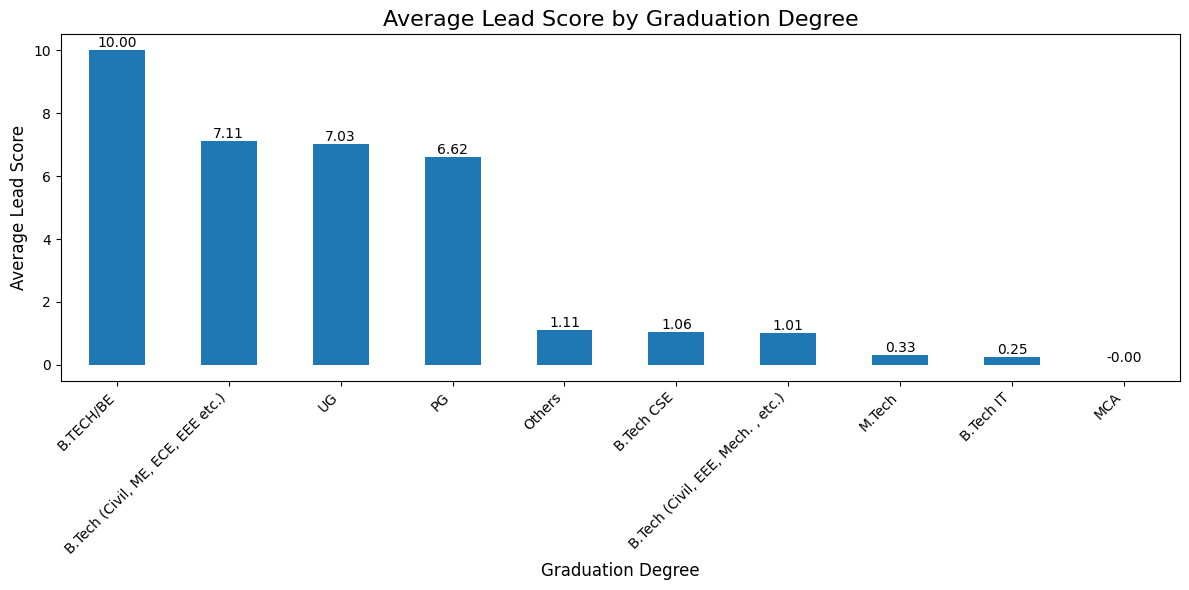

In [48]:
avg_scores = merged_df.groupby('graduation_degree')['lead_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_scores.plot(kind='bar')

plt.title('Average Lead Score by Graduation Degree', fontsize=16)
plt.xlabel('Graduation Degree', fontsize=12)
plt.ylabel('Average Lead Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(avg_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [45]:
print(merged_df['graduation_degree'].unique())

['Others' 'B.Tech (Civil, EEE, Mech. , etc.)' 'B.Tech IT' 'M.Tech'
 'B.Tech CSE' 'UG' 'MCA' 'PG' 'B.Tech (Civil, ME, ECE, EEE etc.)'
 'B.TECH/BE']


In [47]:
graduation_degree_score = {
    'B.TECH/BE' : 5,
     'B.Tech (Civil, ME, ECE, EEE etc.)' : 4,
     'UG' : 4,
     'PG' : 3,
     'Others' : 2,
     'B.Tech CSE' : 2,
     'B.Tech (Civil, EEE, Mech. , etc.)' : 2,
     'M.Tech' : 1,
     'B.Tech IT' : 1,
     'MCA' : 0
}

In [49]:
merged_df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,...,form_name,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source
0,2704878,Pranav,l:861701659054416,NaN,0.0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar
1,2288584,Ramakrishnan,l:966563021758786,0.0,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",70.0,0.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Futurense USP - Website
2,2721420,Purnima kuppala,l:430457079653387,NaN,0.0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,B.Tech IT,65.0,5.0,Mapped,Contacted,Counselling Booked,Jatin Luthra,Facebook
3,2712125,Gokul Krishna,l:1547362259166875,0.0,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",75.0,1.0,Mapped,Contacted,Token Amount,Simran Singh,Zoom Webinar
4,700484,Chintan Patel,l:308522655285948,0.0,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-16 15:51:00,...,BM - US pathway Webinar Form - More Volume - N...,Facebook,M.Tech,75.0,5.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook


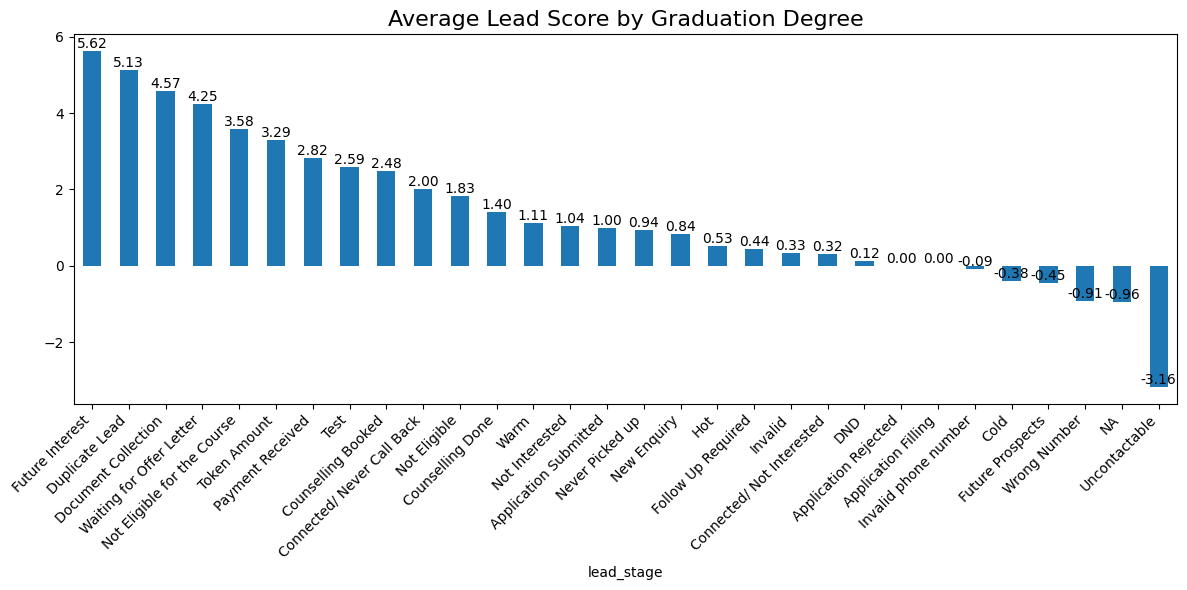

In [52]:
avg_scores = merged_df.groupby('lead_stage')['lead_score'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_scores.plot(kind='bar')

plt.title('Average Lead Score by Graduation Degree', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for i, v in enumerate(avg_scores):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

In [54]:
print(merged_df['lead_stage'].unique())
print(len(merged_df['lead_stage'].unique()))

['Token Amount' 'Document Collection' 'Counselling Booked' 'Test'
 'Application Filling' 'Payment Received' 'New Enquiry' 'Counselling Done'
 'Hot' 'Warm' 'Never Picked up' 'Not Interested' 'Not Eligible'
 'Invalid phone number' 'Follow Up Required' 'Connected/ Not Interested'
 'NA' 'DND' 'Uncontactable' 'Cold' 'Future Prospects'
 'Not Eligible for the Course' 'Future Interest' 'Wrong Number' 'Invalid'
 'Duplicate Lead' 'Application Rejected' 'Application Submitted'
 'Waiting for Offer Letter' 'Connected/ Never Call Back']
30


In [55]:
lead_stage_score = {
    ('Not Interested', 'Invalid phone number', 'Uncontactable', 'Wrong Number', 'Invalid', 'DND', 'Never Picked up'): -1,
    ('Not Eligible', 'NA', 'Not Eligible for the Course', 'Connected/ Not Interested', 'Application Rejected', 'Duplicate Lead', 'Cold', 'Connected/ Never Call Back'): 0,
    ('New Enquiry', 'Follow Up Required', 'Future Interest'): 1,
    ('Counselling Booked', 'Counselling Done', 'Future Prospects'): 2,
    ('Application Filling', 'Application Submitted'): 3,
    ('Warm', 'Hot'): 4,
    ('Token Amount', 'Document Collection', 'Test'): 5,
    ('Payment Received', 'Waiting for Offer Letter'): 6
}

In [65]:
for x, y in lead_stage_score.items():
    if 'DND' in x:
        print(y)

-1


In [56]:
merged_df['status'].unique()

array(['Answered', 'NotAnswered', 'Missed'], dtype=object)

In [61]:
print(graduation_degree_score)

{'B.TECH/BE': 5, 'B.Tech (Civil, ME, ECE, EEE etc.)': 4, 'UG': 4, 'PG': 3, 'Others': 2, 'B.Tech CSE': 2, 'B.Tech (Civil, EEE, Mech. , etc.)': 2, 'M.Tech': 1, 'B.Tech IT': 1, 'MCA': 0}


In [62]:
merged_df['lead_stage'].unique()

array(['Token Amount', 'Document Collection', 'Counselling Booked',
       'Test', 'Application Filling', 'Payment Received', 'New Enquiry',
       'Counselling Done', 'Hot', 'Warm', 'Never Picked up',
       'Not Interested', 'Not Eligible', 'Invalid phone number',
       'Follow Up Required', 'Connected/ Not Interested', 'NA', 'DND',
       'Uncontactable', 'Cold', 'Future Prospects',
       'Not Eligible for the Course', 'Future Interest', 'Wrong Number',
       'Invalid', 'Duplicate Lead', 'Application Rejected',
       'Application Submitted', 'Waiting for Offer Letter',
       'Connected/ Never Call Back'], dtype=object)

In [69]:
def derive_lead_score(df, lead_stage_score, lsq_lead_stage_score, status_score, graduation_degree_score):
    def get_score(value, score_dict):
        if isinstance(next(iter(score_dict.keys())), tuple):
            # For dictionaries with tuple keys
            for key, score in score_dict.items():
                if value in key:
                    return score
        else:
            # For graduation_degree_score with string keys
            return score_dict.get(value, 0)
        return 0  # Return 0 if no match found

    def calculate_row_score(row):
        lead_stage_val = get_score(row['lead_stage'], lead_stage_score)
        lsq_lead_stage_val = get_score(row['lsq_lead_stage'], lsq_lead_stage_score)
        status_val = get_score(row['status'], status_score)
        graduation_degree_val = get_score(row['graduation_degree'], graduation_degree_score)

        total_score = lead_stage_val + lsq_lead_stage_val + status_val + graduation_degree_val
        return min(total_score / 4, 10)

    df['derived_score'] = df.apply(calculate_row_score, axis=1)
    return df

In [70]:
derive_lead_score(merged_df, lead_stage_score, lsq_lead_stage_score, status_score, graduation_degree_score)

,lead_number,first_name,Lead Id,inbound_phone_call_counter,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,...,platform,graduation_degree,graduation_percentage,work_experience,mapped,contacted_y,lsq_lead_stage,lsq_lead_owner,lsq_source,derived_score
0,2704878,Pranav,l:861701659054416,NaN,0.0,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.50
1,2288584,Ramakrishnan,l:966563021758786,0.0,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",70.0,0.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Futurense USP - Website,2.75
2,2721420,Purnima kuppala,l:430457079653387,NaN,0.0,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,...,Facebook,B.Tech IT,65.0,5.0,Mapped,Contacted,Counselling Booked,Jatin Luthra,Facebook,1.25
3,2712125,Gokul Krishna,l:1547362259166875,0.0,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",75.0,1.0,Mapped,Contacted,Token Amount,Simran Singh,Zoom Webinar,2.75
4,700484,Chintan Patel,l:308522655285948,0.0,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-16 15:51:00,...,Facebook,M.Tech,75.0,5.0,Mapped,Contacted,Document Collection,Swapnil Awasthi,Facebook,2.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193354,1508915,Aiswarya,c83032a2-b96a-4a6b-8c98-93ad6476916a-6,0.0,2.0,New Enquiry,0,Saket Rai,Outbound Phone Call Activity,2024-01-12 15:14:00,...,LinkedIn,M.Tech,65.0,1.0,Mapped,Contacted,Not Interested,Bompada Sai Sudeep,LinkedIn,0.25
193355,2704878,Pranav,l:861701659054416,0.0,37.0,Token Amount,1,Ratnesh Mishra,Outbound Phone Call Activity,2024-04-14 12:28:00,...,Facebook,Others,60.0,0.0,Mapped,Contacted,Application Submitted,Ratnesh Mishra,Zoom Webinar,2.50
193356,2293137,Divya Shukla,l:3609611255969786,0.0,12.0,Token Amount,10,Ankur chandra,Outbound Phone Call Activity,2024-03-27 12:44:00,...,Facebook,B.Tech CSE,80.0,2.0,Mapped,Contacted,Not Interested,Ankur chandra,Zoom Webinar,1.50
193357,2293667,Dev Bhandarker,l:8106492436034710,2.0,0.0,Counselling Booked,1,Suryansh Tiwari,Inbound Phone Call Activity,2024-03-04 19:13:00,...,Facebook,"B.Tech (Civil, EEE, Mech. , etc.)",75.0,0.0,Mapped,Contacted,Not Interested,Suryansh Tiwari,Zoom Webinar,0.75


In [68]:
print(graduation_degree_score)
print(lsq_lead_stage_score)
print(lead_stage_score)
print(lsq_lead_stage_score)

{'B.TECH/BE': 5, 'B.Tech (Civil, ME, ECE, EEE etc.)': 4, 'UG': 4, 'PG': 3, 'Others': 2, 'B.Tech CSE': 2, 'B.Tech (Civil, EEE, Mech. , etc.)': 2, 'M.Tech': 1, 'B.Tech IT': 1, 'MCA': 0}
{('Not Interested', 'Not Interested', 'Invalid phone number', 'Uncontactable', 'Wrong Number', 'Invalid', 'DND'): -1, ('Not Eligible', '', 'Not Eligible for the Course', 'Connected/ Not Interested', 'Application Rejected', 'Duplicate Lead'): 0, ('New Enquiry', 'Follow Up Required'): 1, ('Counselling Booked', 'Counselling Done'): 2, ('Application Filling', 'Application Submitted'): 3, ('Token Amount', 'Document Collection', 'Test'): 4, ('Payment Received', 'Waiting for Offer Letter', 'Future Interest', 'Future Prospects'): 5, ('Warm', 'Hot'): 6}
{('Not Interested', 'Invalid phone number', 'Uncontactable', 'Wrong Number', 'Invalid', 'DND', 'Never Picked up'): -1, ('Not Eligible', 'NA', 'Not Eligible for the Course', 'Connected/ Not Interested', 'Application Rejected', 'Duplicate Lead', 'Cold', 'Connected/ N

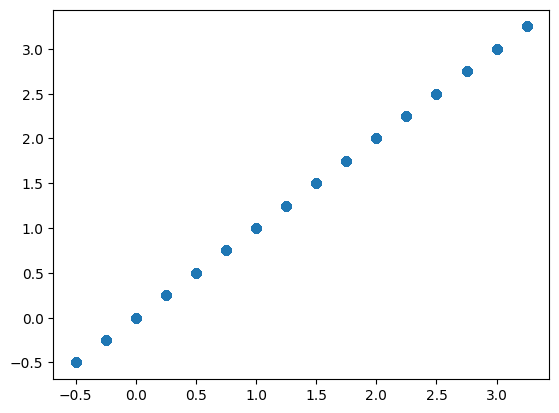

In [71]:
plt.scatter(merged_df['derived_score'], merged_df['derived_score'])